In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
col_names = ['line', 'direction', 'station_diva_id', 'date', 'should_arrive_at', 
              'actually_arrived_at', 'next_station_diva_nach']

Only working with single public transport station to predict the behaviour on single station

In [3]:
targetStationId = 2572

Read weekly data, filter out and append to stationDS (i.e. station dataset)

In [4]:
stationDS = pd.DataFrame(columns=col_names)

csv_names = ['fahrzeiten_soll_ist_20190630_20190706.csv',
             'fahrzeiten_soll_ist_20190623_20190629.csv',
             'fahrzeiten_soll_ist_20190616_20190622.csv', 
             'fahrzeiten_soll_ist_20190609_20190615.csv',
             'fahrzeiten_soll_ist_20190602_20190608.csv',
             'fahrzeiten_soll_ist_20190526_20190601.csv',
             'fahrzeiten_soll_ist_20190519_20190525.csv',
             'fahrzeiten_soll_ist_20190512_20190518.csv',
             'fahrzeiten_soll_ist_20190505_20190511.csv',
             'fahrzeiten_soll_ist_20190428_20190504.csv',
             'fahrzeiten_soll_ist_20190421_20190427.csv',
             'fahrzeiten_soll_ist_20190414_20190420.csv']

for name in csv_names:
    dataSet = pd.read_csv('data/' + name)
    # filter required columns
    ds = dataSet.loc[:, ['linie', 'richtung', 'halt_diva_von', 'datum_von', 'soll_an_von', 'ist_an_von', 'halt_diva_nach']]
    # filter data for only the target station
    ds = ds.loc[ds['halt_diva_von'] == targetStationId]
    # rename column name to English
    ds.columns = col_names
    # Calculate delays
    ds['delays'] = ds['actually_arrived_at'] - ds['should_arrive_at']
    # Filter out rows with delay 0 <= dealy < 600
    ds = ds.loc[(ds['delays'] >= 0) & (ds['delays'] < 600)]
    # Append to stationDS
    stationDS = stationDS.append(ds.copy())
    # Release memory
    del ds

/home/faizi/programs/anaconda3/envs/dps/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [5]:
print('stationDS shape: ', stationDS.shape)
# sort data by date and expected arrival time
stationDS['date'] = pd.to_datetime(stationDS['date'])
stationDS = stationDS.sort_values(by=['date', 'should_arrive_at'], ascending=True)
stationDS.head(10)

stationDS shape:  (88066, 8)


,actually_arrived_at,date,delays,direction,line,next_station_diva_nach,should_arrive_at,station_diva_id
792626,273,2019-01-05,81.0,2,94,3034,192,2572
152875,508,2019-01-05,4.0,1,75,694,504,2572
1270327,673,2019-01-05,37.0,2,11,3154,636,2572
958421,736,2019-01-05,4.0,1,14,2151,732,2572
748466,1156,2019-01-05,136.0,1,15,6033,1020,2572
57267,1159,2019-01-05,7.0,2,10,3034,1152,2572
156695,1368,2019-01-05,6.0,1,10,6033,1362,2572
152876,1410,2019-01-05,6.0,1,75,694,1404,2572
156697,1467,2019-01-05,27.0,1,12,6033,1440,2572
1270325,1583,2019-01-05,47.0,2,11,3154,1536,2572


Save to file for reference

In [6]:
fileToSave = 'data/generated/station_' + str(targetStationId) + '.csv'
stationDS.to_csv(fileToSave, encoding='utf-8', index=False)

Data types of the columns

In [7]:
stationDS.dtypes
stationDS.date.unique()

array(['2019-01-05T00:00:00.000000000', '2019-01-06T00:00:00.000000000',
       '2019-01-07T00:00:00.000000000', '2019-02-05T00:00:00.000000000',
       '2019-02-06T00:00:00.000000000', '2019-02-07T00:00:00.000000000',
       '2019-03-05T00:00:00.000000000', '2019-03-06T00:00:00.000000000',
       '2019-03-07T00:00:00.000000000', '2019-04-05T00:00:00.000000000',
       '2019-04-06T00:00:00.000000000', '2019-04-07T00:00:00.000000000',
       '2019-04-14T00:00:00.000000000', '2019-04-15T00:00:00.000000000',
       '2019-04-16T00:00:00.000000000', '2019-04-17T00:00:00.000000000',
       '2019-04-18T00:00:00.000000000', '2019-04-19T00:00:00.000000000',
       '2019-04-20T00:00:00.000000000', '2019-04-21T00:00:00.000000000',
       '2019-04-22T00:00:00.000000000', '2019-04-23T00:00:00.000000000',
       '2019-04-24T00:00:00.000000000', '2019-04-25T00:00:00.000000000',
       '2019-04-26T00:00:00.000000000', '2019-04-27T00:00:00.000000000',
       '2019-04-28T00:00:00.000000000', '2019-04-29

In [8]:
ds = stationDS.copy()

/home/faizi/programs/anaconda3/envs/dps/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


[8, 10, 11, 12, 14, 15, 17, 61, 62, 75, 94]


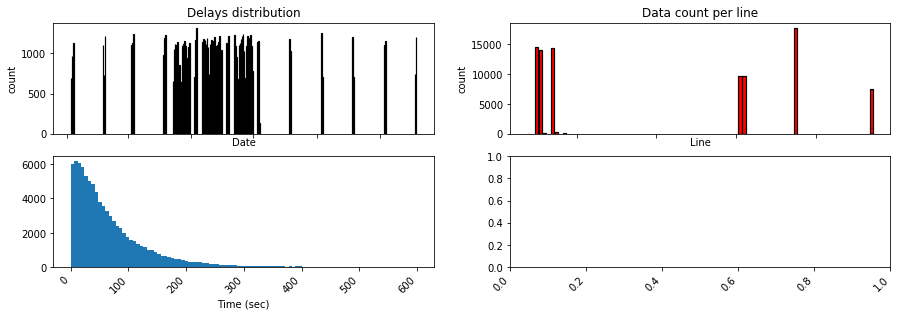

In [9]:
#Plotting graphs

# fig, ax = plt.subplots()
# ax.set_title('Data count per day')
# ax.set_ylabel('count')
# ax.plot(count_per_day.index, count_per_day.line)
# ax.margins(x=0, y=0)

# plt.hist(ds.date)
# plt.ylabel('Data count per day');


# Set up the plotting layout
fig, ((ax1, ax2), (ax21, ax22)) = plt.subplots(nrows=2, ncols=2, figsize = (15,5))
fig.autofmt_xdate(rotation = 45)

ax1.set_xlabel('Date'); ax1.set_ylabel('count'); ax1.set_title('Data count per day')
# ax1.hist(ds.date)
count_per_day = ds.groupby('date').count()
ax1.bar(count_per_day.index, count_per_day.line, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2);


ax2.set_xlabel('Line'); ax2.set_ylabel('count'); ax2.set_title('Data count per line')
# ax2.hist(ds.line);
count_per_line = ds.groupby('line').count()
ax2.bar(count_per_line.index, count_per_line.date, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2);
lines = ds.line.unique()
print(sorted(lines))
# plt.xticks(count_per_line.index, count_per_line['index'].apply(str), rotation='vertical')

# fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize = (15,5))
# fig.autofmt_xdate(rotation = 45)

ax21.set_xlabel('Time (sec)'); ax1.set_ylabel('count'); ax1.set_title('Delays distribution')
ax21.hist(ds.delays, bins=100);
# ax1.scatter(delays, delays);
# count_per_line = ds.groupby('line').count()
# ax2.bar(count_per_line.index, count_per_line.date, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2);

In [10]:
# Add column to represent day of week
# ds['date'] = pd.to_datetime(ds['date'])
ds['day_of_week'] = pd.to_datetime(ds['date']).dt.weekday

# split date into day, month, year
ds['day'] = pd.to_datetime(ds['date']).dt.day
ds['month'] = pd.to_datetime(ds['date']).dt.month
# ds['year'] = pd.to_datetime(ds['date']).dt.year

# drop date column because we splitted it
ds = ds.drop('date', axis = 1)

# drop 'actually_arrived_at' column because we have delays now!
ds = ds.drop('actually_arrived_at', axis = 1)

# Saving feature names for later use
feature_list = list(ds.columns)

print(ds.shape)
ds.head()
# ds.day_of_week.unique()

(88066, 9)


,delays,direction,line,next_station_diva_nach,should_arrive_at,station_diva_id,day_of_week,day,month
792626,81.0,2,94,3034,192,2572,5,5,1
152875,4.0,1,75,694,504,2572,5,5,1
1270327,37.0,2,11,3154,636,2572,5,5,1
958421,4.0,1,14,2151,732,2572,5,5,1
748466,136.0,1,15,6033,1020,2572,5,5,1


In [11]:
# Convert to numpy array
labels = np.array(ds.delays)
features = np.array(ds.drop('delays', axis = 1))

As there are some 0 in labels so when calculating accuracy, dividing by zero results in infinity, so adding 1 to all labels (i.e. delays). Now, 1 means no delay!

In [12]:
labels = labels + 1

In [13]:
print(features[:5])
print(labels[:5])

[[2 94 3034 192 2572 5 5 1]
 [1 75 694 504 2572 5 5 1]
 [2 11 3154 636 2572 5 5 1]
 [1 14 2151 732 2572 5 5 1]
 [1 15 6033 1020 2572 5 5 1]]
[ 82.   5.  38.   5. 137.]


In [14]:
# delete variables
del ds
del stationDS

In [15]:
from sklearn.model_selection import train_test_split

# train_features, test_features, train_labels, test_labels = train_test_split(
#     features, labels, test_size = 0.20, random_state = 42
# );

train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, test_size = 0.20, shuffle=False
);

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (70452, 8)
Training Labels Shape: (70452,)
Testing Features Shape: (17614, 8)
Testing Labels Shape: (17614,)


In [16]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(train_features, train_labels);

In [17]:
print('mean of delay: ', labels.mean())

mean of delay:  71.91379192878068


In [18]:
# Use the forest's predict method on the training data
train_predictions = rf.predict(train_features)

In [19]:
# training set errors
# Calculate the absolute errors
train_errors = abs(train_predictions - train_labels)

print('[Train] Average error:', round(np.mean(train_errors), 2))

print('[Train] SSE: ', round(np.sqrt(np.mean(np.square(train_errors))), 2))

[Train] Average error: 17.05
[Train] SSE:  24.5


In [21]:
print(train_labels[:20])
print(train_predictions[:20])

[ 82.   5.  38.   5. 137.   8.   7.   7.  28.  48.  34.  17. 101.  99.
  88.  74.  93.  41.  10.  42.]
[ 67.524  15.014  41.491  15.784 108.002  28.271  29.227  17.367  39.148
  47.846  43.51   30.8    73.898  85.022  83.035  70.44   98.376  53.795
  31.124  53.156]


In [23]:
# Use the forest's predict method on the test data
test_predictions = rf.predict(test_features)

print(test_labels[:20])
print(test_predictions[:20])

# Test set errors
# Calculate the absolute errors
test_errors = abs(test_predictions - test_labels)

print('[Test] Average error:', round(np.mean(test_errors), 2))
 
print('[Test] SSE: ', round(np.sqrt(np.mean(np.square(test_errors))), 2))
# Print out the mean absolute error (mae)
# print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
# mape = (errors / test_labels)

# # Calculate and display accuracy
# accuracy = 100 - np.mean(mape)
# print('Accuracy:', round(accuracy, 2), '%.')

[ 29. 134. 117.   7.  41. 220.  16. 405. 115.   5.  41.  12.  57. 175.
  16.   6.   4. 365.  39.  36.]
[ 51.15  110.512 204.902  39.199  31.773 241.541  47.399 195.28   71.864
  41.687 202.727 176.888  52.386 174.976  31.927  50.938 212.853 196.984
  71.951  42.351]
[Test] Average error: 53.0
[Test] SSE:  78.95
